# Chương 01. Áp dụng biến đổi hình học lên ảnh

## Contents:
1. Reading, displaying, saving images
2. Loading and saving an image
3. Image color spaces
   - 3.1 Converting color space
   - 3.2 Spitting image channels
   - 3.3 Merging image channel
4. Image translation
5. Image rotation
6. Image scaling
7. Affine transformations
8. Projective transformations
9. Image waring

## 1. Reading, displaying, saving images

- Giả sử ta có một file có định dạng là ảnh được lưu trong máy hay một nơi nào đó với tên là `input.jpg`.
- Để **đọc** ảnh đó  vào chương trình và **display** ta thực thi đoạn code sau:

In [1]:
import cv2
img = cv2.imread("input/input.jpg")
cv2.imshow("Input image", img)
cv2.waitKey(0)f
type(img)
cv2.destroyAllWindows()

- **Quan sát**:
    + `Line 1`: import thư viện để làm việc trong OpenCV.
    + `Line 2`: Gọi thực hiện phương thức **imread()** để đọc một ảnh có **path** nằm bên trong dấu ngoặc đơn.
    + `Line 3`: Gọi thực hiện phương thức **imshow()** để hiển ảnh trong một cửa sổ mới.
    + `Line 4`: Chương trình **dừng lại** và **chờ một kí tự được nhập vào để được thực thi tiếp**.
    + `Line 5`: Kiểm tra xem **kiểu dữ liệu** của đối tượng được tham chiếu bởi **img**. **Kết quả cho thấy ảnh là ma trận.**
    + `Line 6`: Tắt tất cả cửa sổ được mở bằng thư viện cv2

## 2. Loading and saving an image

- **OpenCV** cung cấp nhiều cách load một ảnh vào chương trình.
- Ta có thể load một ảnh với **chế độ thang màu xám (Grayscale mode)** với đoạn code sau:

In [2]:
import cv2
gray_img =cv2.imread("input/input.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imshow('GrayScale', gray_img)
cv2.waitKey(0)
type(gray_img)
cv2.destroyAllWindows()

error: OpenCV(4.1.0) C:\projects\opencv-python\opencv\modules\highgui\src\window.cpp:352: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


- **Nhận xét:**
    - `Line 1`: import thư viện làm việc với OpenCV vào chương trình.
    - `Line 2`: gọi thực hiện phương thức **imread()** để load một file (ở đây là ảnh) có đường dẫn là "input.jpg" dưới chế độ IMREAD_GRAYSCALE (thang màu xám).
    - `Line 3`: Hiển thị một ảnh được lưu trong **gray_img** trong một window mới với tên là `GrayScale`.
    - `Line 4`: Đứng chương trình lại cho đến khi nhập một kí tự bất kì từ bàn phím.
    + `Line 5`: Kiểm tra xem **kiểu dữ liệu** của đối tượng đượng reference bởi **gray_img**. **Kết quả cho thấy ảnh là ma trận.**

- Lưu lại ảnh dưới tên **"output.jpg"**:

In [3]:
cv2.imwrite("output/output.jpg", gray_img)

True

**Changing image format**

- Chúng ta có thể thay đổi **định dạng ban đầu của ảnh (orgirinal image format)** khi lưu lại ảnh qua đoạn code sau:

In [4]:
import cv2
gray_img = cv2.imread("input\input.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imwrite("output\output.png", gray_img, [cv2.IMWRITE_PNG_COMPRESSION])

True

## 3. Image color spaces

- Trong thị giác máy tính và xử lí ảnh, **không gian màu (color spaces)** refer đến một cách cụ thể tổ chức, phối hợp mày sắc.
- Một không gian màu (color space) được tạo nên nhờ combination của 2 phần:
    + Color model.
    + Mapping function.
- Lý do chúng ta đưa ra sử dụng **Color model** là vì nó giúp cho chúng ta thuận tiện trong việc biểu diễn giá trị của các pixel sử dụng tuples.
- Mapping function ánh xạ the color model đến tập hợp tất cả các màu có thể được biểu diễn.

![RGB - Color Space](images/bai01/images/RGB-HSV.png)

- Có rất nhiều không gian màu được sử dụng. Mỗi một không gian màu có một điểm mạnh riêng. Tùy thuộc vào bài toán mà ta chọn color space cho phù hợp.
- Các không gian màu thường dùng nhiều nhất là: RGB, YUV, HSV.
    + **RGB**: Là không gian màu sử dụng nhiều nhất trong nhiều nhất, dựa trên ba màu cơ bản Red, Green, Blue. Trong không gian màu này, mỗi màu được biểu diễn dưới dạng kết hợp có trọng số của đỏ, lục và lam. Vì vậy, mỗi giá trị pixel được biểu diễn dưới dạng một bộ ba số tương ứng với màu đỏ, xanh lá cây và xanh dương. Mỗi giá trị nằm trong khoảng từ 0 đến 255.
    + **YUV**:Mặc dù RGB tốt cho nhiều mục đích, nhưng nó có xu hướng rất hạn chế đối với nhiều ứng dụng thực tế. Mọi người bắt đầu nghĩ về các phương pháp khác nhau để tách thông tin cường độ khỏi thông tin màu sắc. Do đó, họ đã đưa ra không gian màu YUV. Y đề cập đến độ chói hoặc cường độ và các kênh U / V đại diện cho thông tin màu. Điều này hoạt động tốt trong nhiều ứng dụng vì hệ thống thị giác của con người cảm nhận thông tin cường độ rất khác với thông tin màu sắc.

### 3.1 Converting color spaces

- Xem xét tất cả các không gian màu, có hơn 190 tùy chọn chuyển đổi có sẵn trong OpenCV. Ta dùng đoạn code sau để xem danh sách tất cả các tùy chọn có sẵn:

In [5]:
import cv2
color_space_list = [x for x in dir(cv2) if x.startswith("COLOR_")]
print(color_space_list)
print(len(color_space_list))

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

- Ta thấy một danh sách các tùy chọn có sẵn trong OpenCV để chuyển đổi từ một không gian màu sang khác. Chúng ta có thể chuyển đổi khá nhiều không gian màu sang bất kỳ không gian màu nào khác. Hãy xem cách chúng ta có thể chuyển đổi một hình ảnh màu thành một hình ảnh thang độ xám:

In [6]:
import cv2
img = cv2.imread("input\input.jpg", cv2.IMREAD_COLOR)
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
cv2.imshow("Grayscale image", gray_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

- **Nhận xét**: 
    - Chúng ta sử dụng hàm **cvtColor()** để chuyển đổi không gian màu.
    - Đối số đầu tiên là hình ảnh mà ta muốn chuyển đổi và đối số thứ hai chỉ định không gian đich trong việc chuyển đổi.

### 3.2 Splitting image channels (chia kênh hình ảnh)

- Ta có thể chuyển đổi sang YUV bằng cách sử dụng option sau:

In [7]:
import cv2
img = cv2.imread("input\input.jpg", cv2.IMREAD_COLOR)
yuv_img = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
cv2.imshow("YUV imag", yuv_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Điều này có thể trông giống như một phiên bản xấu hơn của hình ảnh gốc, nhưng thực tế không phải vậy. Chúng ta hãy tách ra
trong ba kênh:

In [8]:
import cv2
img = cv2.imread("input\input.jpg", cv2.IMREAD_COLOR)
yuv_img = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
y,u,v = cv2.split(yuv_img)
cv2.imshow('Y channel', y)
cv2.imshow('U channel', u)
cv2.imshow('V channel', v)
cv2.waitKey()
cv2.destroyAllWindows()

In [9]:
# Alternative 2 (Faster)
# cv2.imshow('Y channel', yuv_img[:, :, 0])
# cv2.imshow('U channel', yuv_img[:, :, 1])
# cv2.imshow('V channel', yuv_img[:, :, 2])
# cv2.waitKey()

- Vì **yuv_img** là một đối tượng ndarray (cung cấp các toán tử chọn thứ nguyên), chúng ta có thể tách ra ba kênh bằng cách cắt nó. 
- Nếu xem **yuv_img.shape**, ta thấy rằng nó là một mảng 3D. 

In [10]:
yuv_img.shape

(194, 259, 3)

- Vì vậy, một khi  chạy đoạn code trước, ta sẽ thấy ba hình ảnh khác nhau tương ứng với 3 kênh.

## 3.3 Merging image channels

- Bây giờ chúng ta sẽ đọc một hình ảnh, chia nó thành các kênh riêng biệt và hợp nhất chúng để xem làm thế nào các hiệu ứng khác nhau có thể thu được từ các kết hợp khác nhau:

In [11]:
import cv2
img = cv2.imread("input\input.jpg", cv2.IMREAD_COLOR)
g, b, r = cv2.split(img)
gbr_img = cv2.merge((g,b,r))
rbr_img = cv2.merge((r,b,r))
cv2.imshow("Ogirinal", img)
cv2.imshow("GBR", gbr_img)
cv2.imshow("RBR",rbr_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

- Điều này sẽ cung cấp cho bạn một ý tưởng cơ bản về cách chuyển đổi giữa các không gian màu. Bạn có thể chơi xung quanh với nhiều không gian màu hơn để xem hình ảnh trông như thế nào.

## 4. Image Translation

- Trong phần này, chúng tôi sẽ thảo luận về việc thay đổi một hình ảnh. Ta muốn di chuyển hình ảnh trong khung tham chiếu của chúng ta. 
- Trong thuật ngữ thị giác máy tính (computer vision terminology), điều này được gọi là **translation**.

- Để hiểu đoạn code ở trên, chúng ta cần hiểu cách hoạt động của warping. Translation có nghĩa là chúng ta đang dịch chuyển hình ảnh bằng cách thêm bớt tọa độ x và y. Để thực hiện điều này, chúng ta cần tạo một ma trận biến đổi, như sau:
### $$
  M=
  \left[ {\begin{array}{cc}
   1 & 0 & t_x\\
   0 & 1 & t_y\\
  \end{array} } \right]
$$

- Ở đây, giá trị $t_x$ và $t_y$ là giá trị dịch $x$ và $y$.
- Đó là hình ảnh sẽ được di chuyển theo **x đơn vị ở bên phải và theo đơn vị y trở xuống**.
- Vì vậy, một khi chúng ta tạo ra một ma trận như thế này, chúng ta có thể sử dụng hàm, **warpAffine**, để áp dụng nó cho hình ảnh.
- **Đối số thứ ba trong warpAffine đề cập đến số lượng hàng và cột trong hình ảnh kết quả**.Theo sau đó là cv2.INTER_POLATION thể hiện biến đổi nhờ phương pháp nội suy.

- Vì số lượng hàng và cột giống với hình ảnh gốc, kết quả là hình ảnh sẽ được cắt.
- Lý do cho điều này là chúng ta không có đủ không gian trong đầu ra khi chúng ta áp dụng phép translation ma trận. 
- Để tránh cắt xén, chúng ta có thể làm một cái gì đó tương tự như sau:

In [13]:
import cv2
import numpy as np
img = cv2.imread('input/input.jpg')
num_rows, num_cols = img.shape[:2]
translation_matrix = np.float32([ [1,0,70], [0,1,110] ])
img_translation = cv2.warpAffine(img, translation_matrix, (num_cols + 70, num_rows + 110))
cv2.imshow('Translation', img_translation)
cv2.waitKey()
cv2.destroyAllWindows()

- Giả sử bạn muốn di chuyển hình ảnh vào giữa khung hình lớn hơn; chúng tôi có thể làm một cái gì đó như thế này bằng cách thực hiện như sau:

In [14]:
import cv2
import numpy as np
img = cv2.imread('input/input.jpg')
num_rows, num_cols = img.shape[:2]
translation_matrix = np.float32([ [1,0,70], [0,1,110] ])
img_translation = cv2.warpAffine(img, translation_matrix, (num_cols + 70, num_rows + 110))
translation_matrix = np.float32([ [1,0,-30], [0,1,-50] ])
img_translation = cv2.warpAffine(img_translation, translation_matrix, (num_cols + 70 + 30, num_rows + 110 + 50))
cv2.imshow('Translation', img_translation)
cv2.waitKey()
cv2.destroyAllWindows()

- Hơn nữa, có thêm hai đối số, **BorderMode** và **BorderValue**, cho phép bạn để lấp đầy các viền trống của bản dịch bằng phương pháp ngoại suy pixel:

In [15]:
import cv2
import numpy as np
img = cv2.imread('input/input.jpg')
num_rows, num_cols = img.shape[:2]
translation_matrix = np.float32([ [1,0,70], [0,1,110] ])
img_translation = cv2.warpAffine(img, translation_matrix, (num_cols, num_rows), cv2.INTER_LINEAR, cv2.BORDER_WRAP, 1)
cv2.imshow('Translation', img_translation)
cv2.waitKey()
cv2.destroyAllWindows()

## 5. Image Rotation

Trong phần này, chúng ta sẽ xem cách **xoay một hình ảnh nhất định theo một góc nhất định**. Chúng ta có thể làm được
sử dụng đoạn mã sau:

In [16]:
import cv2
import numpy as np
img = cv2.imread('input/input.jpg')
num_rows, num_cols = img.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), -40, 0.3)
img_rotation = cv2.warpAffine(img, rotation_matrix, (num_cols, num_rows))
cv2.imshow('Rotation', img_rotation)
cv2.waitKey()
cv2.destroyAllWindows()

- Sử dụng **getRotationMatrix2D**, chúng ta có thể chỉ định điểm trung tâm của phép quay hình ảnh sẽ được xoay làm đối số đầu tiên, sau đó là góc xoay theo độ và hệ số tỷ lệ cho hình ảnh ở cuối. Chúng ta sử dụng $0,7$ nhằm thu nhỏ hình ảnh $30\%$ để phù hợp với khung hình.

- Để hiểu điều này, chúng ta hãy xem cách chúng ta xử lý xoay vòng theo toán học.
- **Xoay là cũng là một dạng biến đổi và chúng ta có thể đạt được nó bằng cách sử dụng phép biến đổi sau ma trận**:

### $$
  R=
  \left[ {\begin{array}{cc}
   \cos \theta & -\sin \theta \\
   \sin \theta & \cos \theta \\
  \end{array} } \right]
$$

- Ở đây, $\theta$ là góc quay theo hướng ngược chiều kim đồng hồ.
- OpenCV cung cấp tốt hơn kiểm soát việc tạo ma trận này thông qua hàm getRotationMatrix2D.
- Chúng ta có thể chỉ định điểm xung quanh hình ảnh sẽ được quay, góc quay, và một yếu tố tỷ lệ cho hình ảnh.
- Khi chúng ta có ma trận biến đổi, chúng ta có thể sử dụng hàm **warpAffine** để áp dụng ma trận này cho bất kỳ hình ảnh nào.

- Như chúng ta có thể thấy output của đoạn chương trình trên, nội dung hình ảnh vượt ra ngoài giới hạn và được cắt xén. Để ngăn chặn điều này, chúng tôi cần cung cấp đủ không gian trong hình ảnh đầu ra. Áp dụng các phép biến đổi hình học cho hình ảnh.
- Hãy tiếp tục và làm điều đó bằng cách sử dụng các hàm translations mà chúng ta đã thảo luận trước đó:

In [17]:
import cv2
import numpy as np
img = cv2.imread('input/input.jpg')
num_rows, num_cols = img.shape[:2]
translation_matrix = np.float32([ [1,0,int(0.5*num_cols)], [0,1,int(0.5*num_rows)]])
rotation_matrix = cv2.getRotationMatrix2D((num_cols, num_rows), 30, 1)
img_translation = cv2.warpAffine(img, translation_matrix, (2*num_cols, 2*num_rows))
img_rotation = cv2.warpAffine(img_translation, rotation_matrix, (num_cols*2, num_rows*2))
cv2.imshow('Rotation', img_rotation)
cv2.waitKey()
cv2.destroyAllWindows()

## 6. Image scaling

- Trong phần này, chúng ta sẽ thảo luận về việc thay đổi kích thước (resize) một hình ảnh.
- Đây là một trong những phép toán phổ biến trong thị giác máy tính. 
- Chúng tôi có thể thay đổi kích thước hình ảnh bằng cách sử dụng hệ số tỷ lệ hoặc chúng tôi có thể thay đổi kích thước hình ảnh thành một kích thước cụ thể.

In [1]:
import cv2
img = cv2.imread('input/input.jpg')
img_scaled = cv2.resize(img,None,fx=1.2, fy=1.2, interpolation =cv2.INTER_LINEAR)
cv2.imshow('Scaling - Linear Interpolation', img_scaled)
img_scaled = cv2.resize(img,None,fx=1.2, fy=1.2, interpolation = cv2.INTER_CUBIC)
cv2.imshow('Scaling - Cubic Interpolation', img_scaled)
img_scaled = cv2.resize(img,(450, 400), interpolation = cv2.INTER_AREA)
cv2.imshow('Scaling - Skewed Size', img_scaled)
cv2.imwrite("output\RGB.png",img_scaled)
cv2.waitKey()
cv2.destroyAllWindows()

- Bất cứ khi nào chúng ta thay đổi kích thước hình ảnh, có nhiều cách để điền vào các giá trị pixel. 
- Khi chúng ta phóng to một hình ảnh, chúng ta cần điền vào các giá trị pixel ở giữa các vị trí pixel. 
- Khi chúng ta thu nhỏ một hình ảnh, chúng tôi cần lấy giá trị đại diện tốt nhất.
- Khi chúng ta chia tỷ lệ theo một giá trị không nguyên, chúng ta cần nội suy các giá trị một cách thích hợp, sao cho chất lượng của hình ảnh được duy trì. Có nhiều cách để thực hiện phép nội suy.
- Nếu chúng ta phóng to một hình ảnh, tốt hơn là sử dụng phép nội suy tuyến tính hoặc khối. 
- Nếu chúng ta đang thu hẹp một hình ảnh, tốt hơn là sử dụng phép **nội suy dựa trên khu vực**. **Nội suy hình khối** được tính toán phức tạp hơn, và do đó chậm hơn so với **nội suy tuyến tính**. Tuy nhiên, chất lượng của kết quả hình ảnh sẽ cao hơn.

- `OpenCV` cung cấp một hàm gọi là thay đổi kích thước để đạt được tỷ lệ hình ảnh. 
- Trong ví dụ của trên, hình ảnh sẽ được mở rộng theo hệ số 1,2. 
- Nếu chúng ta thực hiện cùng một phóng to bằng phép nội suy bậc ba, chúng ta có thể thấy rằng chất lượng được cải thiện.

## 7. Affine transformations

- Trong phần này, chúng ta sẽ thảo luận về các phép biến đổi hình học tổng quát khác nhau của 2D hình ảnh.
- Chúng ta đã sử dụng hàm **warpAffine** một vài chỗ lúc trước, đó là khoảng thời gian chúng tôi hiểu những gì đang xảy ra bên dưới.

- Trước khi nói về các phép biến đổi affine, chúng ta hãy tìm hiểu các **phép biến đổi Euclide là gì**. 
- Các phép biến đổi Euclide là một dạng biến đổi hình học bảo toàn độ dài và góc.
- Nếu chúng ta có một hình dạng hình học và áp dụng biến đổi Euclide cho nó, hình dạng sẽ không thay đổi.
- Nó có thể xoay, thay đổi, và như vậy, nhưng cơ bản cấu trúc sẽ không thay đổi.
- Vì vậy, về mặt kỹ thuật, các dòng sẽ vẫn là các dòng, các mặt phẳng sẽ vẫn là các mặt phẳng, hình vuông sẽ vẫn là hình vuông, và hình tròn sẽ vẫn là hình tròn.

![Euclid Tranform](https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Rotation_illustration2.svg/1200px-Rotation_illustration2.svg.png)

- Quay trở lại với các phép biến đổi affine, chúng ta có thể nói rằng chúng là những khái quát của Biến đổi Euclide. 
- Dưới sự đa dạng của các phép biến đổi affine, các dòng sẽ vẫn còn các đường, nhưng hình vuông có thể trở thành hình chữ nhật hoặc hình bình hành. Về cơ bản, **affine biến đổi không bảo tồn độ dài và góc**.

- Để xây dựng một ma trận biến đổi affine chung, chúng ta cần xác định điều khiển điểm. Khi chúng ta có các điểm kiểm soát này, chúng ta cần quyết định nơi chúng ta muốn chúng ánh xạ. Trong tình huống cụ thể này, tất cả những gì chúng ta cần là ba điểm trong hình ảnh nguồn và ba điểm trong hình ảnh đầu ra. Chúng ta hãy xem làm thế nào chúng ta có thể chuyển đổi một hình ảnh thành một hình ảnh giống như hình bình hành:

In [19]:
import cv2
import numpy as np
img = cv2.imread('input/input.jpg')
rows, cols = img.shape[:2]
src_points = np.float32([[0,0], [cols-1,0], [0,rows-1]])
dst_points = np.float32([[0,0], [int(0.6*(cols-1)),0], [int(0.4*(cols-1)),rows-1]])
affine_matrix = cv2.getAffineTransform(src_points, dst_points)
img_output = cv2.warpAffine(img, affine_matrix, (cols,rows))
cv2.imshow('Input', img)
cv2.imshow('Output', img_output)
cv2.waitKey()
cv2.destroyAllWindows()

- Như chúng ta đã thảo luận trước đó, chúng ta đang xác định các điểm kiểm soát. Chúng ta chỉ cần ba điểm để có được ma trận biến đổi affine. 
- Chúng ta muốn ba điểm trong **src_point** được ánh xạ (mapping) tới điểm tương ứng trong **dst_point**. Chúng ta đang ánh xạ các điểm như thể hiện dưới đây hình ảnh:

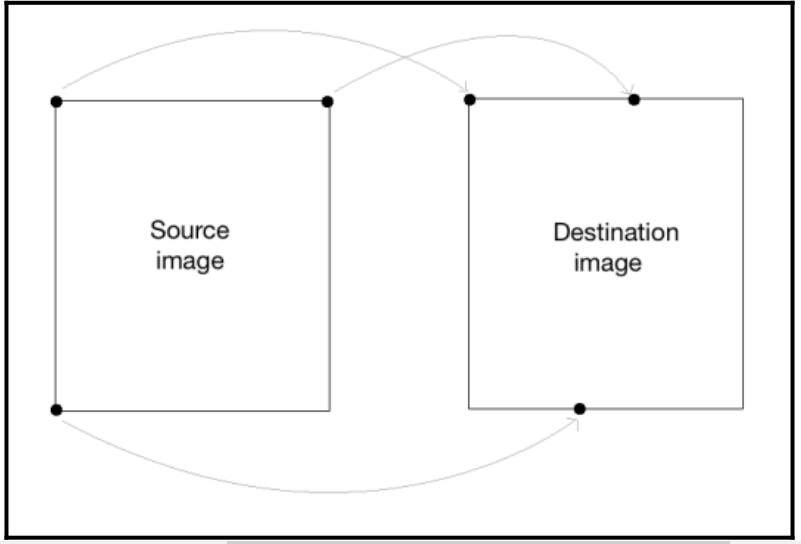

- Để có được ma trận biến đổi, chúng ta có một hàm được gọi trong OpenCV. Khi chúng ta có ma trận biến đổi affine, chúng ta sử dụng hàm để áp dụng ma trận này cho hình ảnh đầu vào.

- Chúng ta cũng có thể có được hình ảnh phản chiếu của hình ảnh đầu vào. Chúng ta chỉ cần thay đổi điều khiển điểm theo cách sau:

In [20]:
import cv2
import numpy as np
img = cv2.imread('input\input.jpg')
rows, cols = img.shape[:2]
src_points = np.float32([[0,0], [cols-1, 0], [0, rows-1]])
dst_points = np.float32([[cols-1, 0], [0, 0], [cols-1, rows-1]])
affine_matrix = cv2.getAffineTransform(src_points, dst_points)
img_output = cv2.warpAffine(img, affine_matrix, (cols,rows))
cv2.imshow('Input', img)
cv2.imshow('Output', img_output)
cv2.waitKey()

27

- Ở đây, ánh xạ trông giống như thế này:

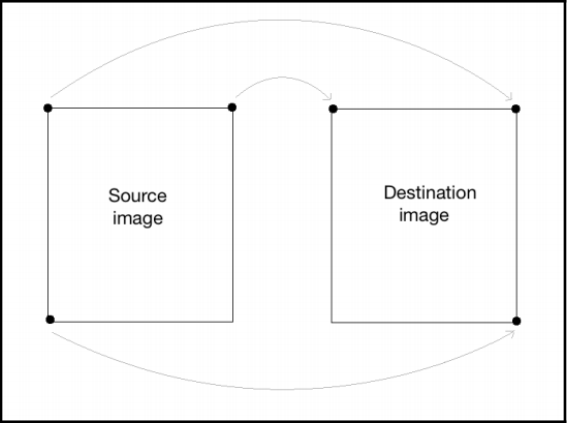

## 8. Projective transformations

- Biến đổi affine rất hay, nhưng chúng áp đặt một số hạn chế nhất định. 
- Một sự chuyển đổi mang tính phóng chiếu, mặt khác, cho chúng ta nhiều tự do hơn.
- Để hiểu các phép biến đổi phóng xạ, chúng ta cần hiểu cách hoạt động của hình học chiếu. 
- Về cơ bản chúng ta mô tả những gì xảy ra với một hình ảnh khi điểm quan sát thay đổi. 
- Ví dụ, nếu bạn đang đứng ngay trước một tờ giấy có hình vuông được vẽ trên đó, nó sẽ trông giống như một hình vuông.

- Bây giờ, nếu bạn bắt đầu nghiêng tờ giấy đó, hình vuông sẽ bắt đầu trông ngày càng giống hình thang. Các phép biến đổi phóng xạ cho phép chúng ta nắm bắt được động lực này theo một cách toán học tốt đẹp. 
- Những biến đổi này không bảo tồn kích thước cũng như góc độ, nhưng chúng không làm thay đổi tỷ lệ và tỷ lệ chéo.

Đọc thêm về tỷ lệ và tỷ lệ chéo:  
- https://en.wikipedia.org/wiki/Incidence_(geometry)
-  http://en.wikipedia.org/wiki/Cross-ratio.

- Bây giờ chúng ta đã biết các phép biến đổi phóng xạ là gì, hãy xem liệu chúng ta có thể trích xuất thêm không thông tin ở đây. Chúng ta có thể nói rằng bất kỳ hai hình ảnh trên một mặt phẳng nhất định đều có liên quan bởi một đồng nhất. 
- Miễn là chúng ở trong cùng một mặt phẳng, chúng ta có thể biến đổi bất cứ thứ gì thành còn gì nữa không. Điều này có nhiều ứng dụng thực tế như tăng cường thực tế, hình ảnh chỉnh lưu, đăng ký hình ảnh hoặc tính toán chuyển động của camera giữa hai hình ảnh.
- Khi xoay và dịch máy ảnh đã được trích xuất từ một ước tính ma trận homography, thông tin này có thể được sử dụng để điều hướng hoặc để chèn các mô hình 3D các đối tượng thành một hình ảnh hoặc video. Bằng cách này, chúng được hiển thị với quan điểm chính xác, và có vẻ như chúng là một phần của bối cảnh ban đầu

In [21]:
import cv2
import numpy as np
img = cv2.imread('input\input.jpg')
rows, cols = img.shape[:2]
src_points = np.float32([[0,0], [cols-1,0], [0,rows-1], [cols-1,rows-1]])
dst_points = np.float32([[0,0], [cols-1,0], [int(0.33*cols),rows-1], [int(0.66*cols),rows-1]])
projective_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
img_output = cv2.warpPerspective(img, projective_matrix, (cols,rows))
cv2.imshow('Input', img)
cv2.imshow('Output', img_output)
cv2.waitKey()
cv2.destroyAllWindows()

- Chúng ta có thể chọn bốn điểm kiểm soát trong hình ảnh nguồn và ánh xạ chúng đến đích hình ảnh. 
- Các đường song song sẽ không duy trì các đường song song sau khi chuyển đổi.
- Chúng ta sử dụng một hàm được gọi là **getPers perspectiveTransform** để lấy ma trận biến đổi.

- Chúng ta hãy áp dụng một vài hiệu ứng thú vị bằng cách sử dụng phép biến đổi phóng xạ và xem chúng trông như thế nào như. Tất cả những gì chúng ta cần làm là thay đổi các điểm kiểm soát để có được các hiệu ứng khác nhau

In [22]:
import cv2
import numpy as np
img = cv2.imread('input\input.jpg')
rows, cols = img.shape[:2]
src_points = np.float32([[0,0], [0,rows-1], [cols/2,0],[cols/2,rows-1]])
dst_points = np.float32([[0,100], [0,rows-101],
[cols/2,0],[cols/2,rows-1]])
projective_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
img_output = cv2.warpPerspective(img, projective_matrix, (cols,rows))
cv2.imshow('Input', img)
cv2.imshow('Output', img_output)
cv2.waitKey()
cv2.destroyAllWindows()

- Như một bài tập, bạn nên ánh xạ các điểm trước trên một mặt phẳng và xem các điểm đó như thế nào ánh xạ (giống như chúng ta đã làm trước đó, trong khi thảo luận về các phép biến đổi **affine**). 
- Bạn hiểu rõ về hệ thống ánh xạ và bạn có thể tạo điều khiển các điểm theo ý của mình. Nếu chúng ta muốn có được hiệu ứng tương tự trên trục $y$, chúng ta có thể áp dụng trước đó biến đổi.

## 9. Image warping

- Chúng ta hãy vui vẻ hơn với những hình ảnh và xem những gì chúng ta có thể đạt được.
- Các phép biến đổi phóng xạ khá linh hoạt, nhưng chúng vẫn áp đặt một số hạn chế về cách chúng ta có thể biến đổi các điểm. 
- Điều gì nếu chúng ta muốn làm một cái gì đó hoàn toàn ngẫu nhiên? Chúng ta cần kiểm soát nhiều hơn, phải không? Nó chỉ xảy ra như vậy chúng ta có thể làm điều đó là tốt. Chúng ta chỉ cần tạo bản đồ của riêng mình và điều đó không khó. 
- Sau đây là một vài hiệu ứng mà bạn có thể đạt được với độ cong hình ảnh:

In [23]:
import cv2
import numpy as np
import math
img = cv2.imread('input\input.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape
####################Ê
# Vertical wave
img_output = np.zeros(img.shape, dtype=img.dtype)
for i in range(rows):
    for j in range(cols):
        offset_x = int(25.0 * math.sin(2 * 3.14 * i / 180))
        offset_y = 0
        if j+offset_x < rows:
            img_output[
                i,j] = img[i,(j+offset_x)%cols]
        else:
            img_output[i,j] = 0
cv2.imshow('Input', img)
cv2.imshow('Vertical wave', img_output)
#####################
# Horizontal wave
img_output = np.zeros(img.shape, dtype=img.dtype)
for i in range(rows):
    for j in range(cols):
        offset_x = 0
        offset_y = int(16.0 * math.sin(2 * 3.14 * j / 150))
        if i+offset_y < rows:
            img_output[i,j] = img[(i+offset_y)%rows,j]
        else:
            img_output[i,j] = 0
            
cv2.imshow('Horizontal wave', img_output)
#####################
# Both horizontal and vertical
img_output = np.zeros(img.shape, dtype=img.dtype)
for i in range(rows):
    for j in range(cols):
        offset_x = int(20.0 * math.sin(2 * 3.14 * i / 150))
        offset_y = int(20.0 * math.cos(2 * 3.14 * j / 150))
        if i+offset_y < rows and j+offset_x < cols:
            img_output[i,j] = img[(i+offset_y)%rows,(j+offset_x)%cols]
        else:
            img_output[i,j] = 0

cv2.imshow('Multidirectional wave', img_output)
#####################
# Concave effect
img_output = np.zeros(img.shape, dtype=img.dtype)
for i in range(rows):
    for j in range(cols):
        offset_x = int(128.0 * math.sin(2 * 3.14 * i / (2*cols)))
        offset_y = 0
        if j+offset_x < cols:
            img_output[i,j] = img[i,(j+offset_x)%cols]
        else:
            img_output[i,j] = 0
            
cv2.imshow('Concave', img_output)
cv2.waitKey()
cv2.destroyAllWindows()

## Kết luận

- Chúng ta đã thảo luận về cách đọc, hiển thị và lưu hình ảnh. Chúng ta đã nói về tầm quan trọng của các không gian màu khác nhau và cách chúng ta có thể chuyển đổi thành nhiều không gian màu, tách và hợp nhất chúng. 
- Chúng ta đã học cách áp dụng các phép biến đổi hình học cho hình ảnh và hiểu cách sử dụng các phép biến đổi đó để đạt được các hiệu ứng hình học thú vị. 
- Chúng ta đã thảo luận về công thức cơ bản của ma trận biến đổi và cách chúng ta có thể xây dựng các loại biến đổi khác nhau dựa trên nhu cầu của chúng ta.
- Chúng ta đã học cách chọn điểm kiểm soát dựa trên phép biến đổi hình học cần thiết. Chúng ta đã thảo luận về các phép biến đổi ?? và học cách sử dụng ?? hình ảnh để đạt được bất kỳ hiệu ứng hình học nào.
- Trong chương tiếp theo, chúng ta sẽ thảo luận về phát hiện cạnh và lọc hình ảnh. Chúng ta có thể áp dụng rất nhiều hiệu ứng hình ảnh bằng cách sử dụng các bộ lọc hình ảnh và sự hình thành bên dưới cho chúng ta rất nhiều sự tự do để thao tác hình ảnh theo những cách sáng tạo.